# Value at Risk

## Import Libraries

In [19]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

## set time for number of years

In [4]:
years = 15

endDate = dt.datetime.now()
startDate= endDate - dt.timedelta(days= 365*years)

### tickers

In [5]:
tickers=['SPY', 'BND', 'GLD','QQQ', 'VTI']

### Download daily adjusted close prices

In [8]:
adj_close_df= pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start= startDate, end = endDate)
    adj_close_df[ticker]= data['Adj Close']
    
    print(adj_close_df)

[*********************100%***********************]  1 of 1 completed
                   SPY
Date                  
2009-07-23   73.857979
2009-07-24   74.160507
2009-07-27   74.379852
2009-07-28   74.031960
2009-07-29   73.850449
...                ...
2024-07-12  559.989990
2024-07-15  561.530029
2024-07-16  564.859985
2024-07-17  556.940002
2024-07-18  552.659973

[3772 rows x 1 columns]
[*********************100%***********************]  1 of 1 completed
                   SPY        BND
Date                             
2009-07-23   73.857979  50.613537
2009-07-24   74.160507  50.633057
2009-07-27   74.379852  50.567989
2009-07-28   74.031960  50.620026
2009-07-29   73.850449  50.600510
...                ...        ...
2024-07-12  559.989990  72.980003
2024-07-15  561.530029  72.750000
2024-07-16  564.859985  73.029999
2024-07-17  556.940002  73.099998
2024-07-18  552.659973  72.910004

[3772 rows x 2 columns]
[*********************100%***********************]  1 of 1 completed
  

## Claculate daily log returns and drop NAs

In [10]:
log_returns= np.log(adj_close_df/adj_close_df.shift(1))
log_returns = log_returns.dropna()

print (log_returns)

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2009-07-24  0.004088  0.000386  0.001607 -0.007653  0.003244
2009-07-27  0.002953 -0.001286  0.003206  0.007653  0.004243
2009-07-28 -0.004688  0.001029 -0.017221 -0.006885 -0.002422
2009-07-29 -0.002455 -0.000386 -0.009929  0.006631 -0.004862
2009-07-30  0.010391  0.004492  0.004595  0.005830  0.010706
...              ...       ...       ...       ...       ...
2024-07-12  0.006288  0.002607 -0.000627  0.005858  0.006588
2024-07-15  0.002746 -0.003157  0.003222  0.002684  0.004272
2024-07-16  0.005913  0.003841  0.019730  0.000383  0.008203
2024-07-17 -0.014120  0.000958 -0.004654 -0.029794 -0.014217
2024-07-18 -0.007715 -0.002602 -0.006402 -0.004744 -0.008760

[3771 rows x 5 columns]


## Create an equally weighted portfolio


In [11]:
portfolio_value= 1000000
weights = np.array([1/len(tickers)]*len(tickers))
print(weights)

[0.2 0.2 0.2 0.2 0.2]


## calculate historical returns

In [13]:
historical_returns = (log_returns * weights).sum(axis=1)
print(historical_returns)

Date
2009-07-24    0.000334
2009-07-27    0.003354
2009-07-28   -0.006038
2009-07-29   -0.002200
2009-07-30    0.007203
                ...   
2024-07-12    0.004143
2024-07-15    0.001954
2024-07-16    0.007614
2024-07-17   -0.012366
2024-07-18   -0.006045
Length: 3771, dtype: float64


## Find X-day historical returns

In [14]:
days= 5
range_returns = historical_returns.rolling(window=days).sum()
range_returns = range_returns.dropna()
print(range_returns)

Date
2009-07-30    0.002653
2009-07-31    0.006926
2009-08-03    0.013626
2009-08-04    0.022468
2009-08-05    0.021812
                ...   
2024-07-12    0.007509
2024-07-15    0.010981
2024-07-16    0.018023
2024-07-17   -0.001212
2024-07-18   -0.004700
Length: 3767, dtype: float64


### Specify a confidence interval and calculate the VaR using historical method

In [15]:
confidence_interval = 0.95

VaR = -np.percentile(range_returns, 100 - (confidence_interval*100))* portfolio_value
print(VaR)

23784.60307291399


## Plot the results of historical returns

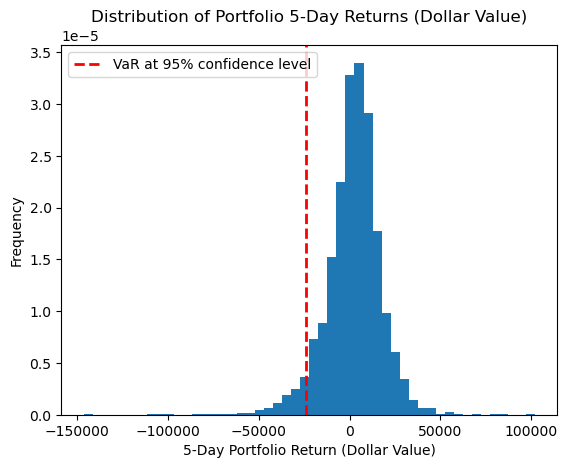

In [20]:
return_window = days
range_returns = historical_returns.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns_dollar = range_returns * portfolio_value

plt.hist(range_returns_dollar.dropna(), bins=50, density=True)
plt.xlabel(f'{return_window}-Day Portfolio Return (Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {return_window}-Day Returns (Dollar Value)')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()